In [17]:
# pip install tensorflow

In [1]:
import torch 
from torchvision import transforms , models 
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = ("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
model = models.vgg19(pretrained=True).features
for p in model.parameters():
    p.requires_grad = False
model.to(device)

C:\Users\ACER\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\ACER\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to C:\Users\ACER/.cache\torch\hub\checkpoints\vgg19-dcbb9e9d.pth
100%|████████████████████████████████████████████████████████████████████████████████████████████| 548M/548M [02:57<00:00, 3.23MB/s]


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [4]:
def model_activations(input,model):
    layers = {
    '0' : 'conv1_1',
    '5' : 'conv2_1',
    '10': 'conv3_1',
    '19': 'conv4_1',
    '21': 'conv4_2',
    '28': 'conv5_1'
    }
    features = {}
    x = input
    x = x.unsqueeze(0)
    for name,layer in model._modules.items():
        x = layer(x)
        if name in layers:
            features[layers[name]] = x 
    
    return features

In [5]:

transform = transforms.Compose([transforms.Resize(300),
                              transforms.ToTensor(),
                              transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [6]:
content = Image.open("golden_gate.jpg").convert("RGB")
content = transform(content).to(device)
print("COntent shape => ", content.shape)
style = Image.open("style.jpg").convert("RGB")
style = transform(style).to(device)

COntent shape =>  torch.Size([3, 300, 400])


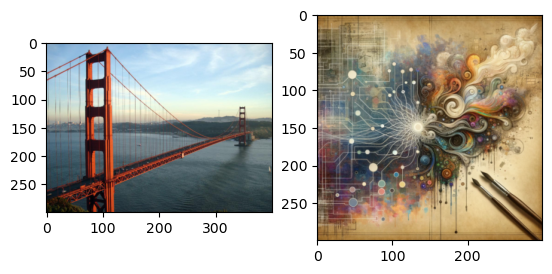

In [7]:
def imcnvt(image):
    x = image.to("cpu").clone().detach().numpy().squeeze()
    x = x.transpose(1,2,0)
    x = x*np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5))
    return np.clip(x,0,1)

fig, (ax1,ax2) = plt.subplots(1,2)

ax1.imshow(imcnvt(content),label = "Content")
ax2.imshow(imcnvt(style),label = "Style")
plt.show()

In [8]:
def gram_matrix(imgfeature):
    _,d,h,w = imgfeature.size()
    imgfeature = imgfeature.view(d,h*w)
    gram_mat = torch.mm(imgfeature,imgfeature.t())
    
    return gram_mat

In [9]:
target = content.clone().requires_grad_(True).to(device)

#set device to cuda if available
print("device = ",device)

device =  cpu


In [10]:
style_features = model_activations(style,model)
content_features = model_activations(content,model)

In [11]:
style_wt_meas = {"conv1_1" : 1.0, 
                 "conv2_1" : 0.8,
                 "conv3_1" : 0.4,
                 "conv4_1" : 0.2,
                 "conv5_1" : 0.1}

In [12]:

style_grams = {layer:gram_matrix(style_features[layer]) for layer in style_features}

In [13]:
content_wt = 100
style_wt = 1e8

In [14]:
print_after = 500
epochs = 4000

In [15]:
optimizer = torch.optim.Adam([target],lr=0.007)

epoch  10   tensor(1.6334e+18, grad_fn=<AddBackward0>)
epoch  20   tensor(1.0991e+18, grad_fn=<AddBackward0>)
epoch  30   tensor(8.8209e+17, grad_fn=<AddBackward0>)
epoch  40   tensor(7.9652e+17, grad_fn=<AddBackward0>)
epoch  50   tensor(7.5306e+17, grad_fn=<AddBackward0>)
epoch  60   tensor(7.2369e+17, grad_fn=<AddBackward0>)
epoch  70   tensor(7.0343e+17, grad_fn=<AddBackward0>)
epoch  80   tensor(6.8920e+17, grad_fn=<AddBackward0>)
epoch  90   tensor(6.7846e+17, grad_fn=<AddBackward0>)
epoch  100   tensor(6.6992e+17, grad_fn=<AddBackward0>)
epoch  110   tensor(6.6293e+17, grad_fn=<AddBackward0>)
epoch  120   tensor(6.5700e+17, grad_fn=<AddBackward0>)
epoch  130   tensor(6.5187e+17, grad_fn=<AddBackward0>)
epoch  140   tensor(6.4735e+17, grad_fn=<AddBackward0>)
epoch  150   tensor(6.4330e+17, grad_fn=<AddBackward0>)
epoch  160   tensor(6.3962e+17, grad_fn=<AddBackward0>)
epoch  170   tensor(6.3628e+17, grad_fn=<AddBackward0>)
epoch  180   tensor(6.3319e+17, grad_fn=<AddBackward0>)
e

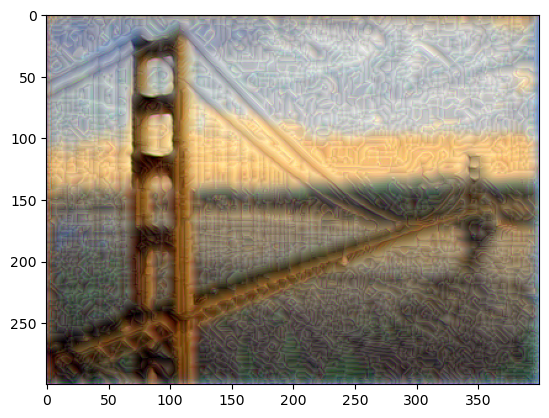

epoch  510   tensor(5.8518e+17, grad_fn=<AddBackward0>)
epoch  520   tensor(5.8444e+17, grad_fn=<AddBackward0>)
epoch  530   tensor(5.8371e+17, grad_fn=<AddBackward0>)
epoch  540   tensor(5.8300e+17, grad_fn=<AddBackward0>)
epoch  550   tensor(5.8231e+17, grad_fn=<AddBackward0>)
epoch  560   tensor(5.8164e+17, grad_fn=<AddBackward0>)
epoch  570   tensor(5.8098e+17, grad_fn=<AddBackward0>)
epoch  580   tensor(5.8033e+17, grad_fn=<AddBackward0>)
epoch  590   tensor(5.7970e+17, grad_fn=<AddBackward0>)
epoch  600   tensor(5.7909e+17, grad_fn=<AddBackward0>)
epoch  610   tensor(5.7849e+17, grad_fn=<AddBackward0>)
epoch  620   tensor(5.7791e+17, grad_fn=<AddBackward0>)
epoch  630   tensor(5.7733e+17, grad_fn=<AddBackward0>)
epoch  640   tensor(5.7677e+17, grad_fn=<AddBackward0>)
epoch  650   tensor(5.7622e+17, grad_fn=<AddBackward0>)
epoch  660   tensor(5.7568e+17, grad_fn=<AddBackward0>)
epoch  670   tensor(5.7515e+17, grad_fn=<AddBackward0>)
epoch  680   tensor(5.7463e+17, grad_fn=<AddBack

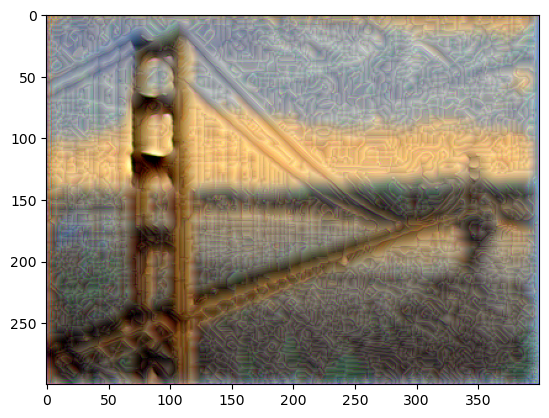

epoch  1010   tensor(5.6348e+17, grad_fn=<AddBackward0>)
epoch  1020   tensor(5.6328e+17, grad_fn=<AddBackward0>)
epoch  1030   tensor(5.6309e+17, grad_fn=<AddBackward0>)
epoch  1040   tensor(5.6290e+17, grad_fn=<AddBackward0>)
epoch  1050   tensor(5.6272e+17, grad_fn=<AddBackward0>)
epoch  1060   tensor(5.6254e+17, grad_fn=<AddBackward0>)
epoch  1070   tensor(5.6237e+17, grad_fn=<AddBackward0>)
epoch  1080   tensor(5.6220e+17, grad_fn=<AddBackward0>)
epoch  1090   tensor(5.6203e+17, grad_fn=<AddBackward0>)
epoch  1100   tensor(5.6187e+17, grad_fn=<AddBackward0>)
epoch  1110   tensor(5.6172e+17, grad_fn=<AddBackward0>)
epoch  1120   tensor(5.6157e+17, grad_fn=<AddBackward0>)
epoch  1130   tensor(5.6142e+17, grad_fn=<AddBackward0>)
epoch  1140   tensor(5.6128e+17, grad_fn=<AddBackward0>)
epoch  1150   tensor(5.6114e+17, grad_fn=<AddBackward0>)
epoch  1160   tensor(5.6101e+17, grad_fn=<AddBackward0>)
epoch  1170   tensor(5.6088e+17, grad_fn=<AddBackward0>)
epoch  1180   tensor(5.6075e+17

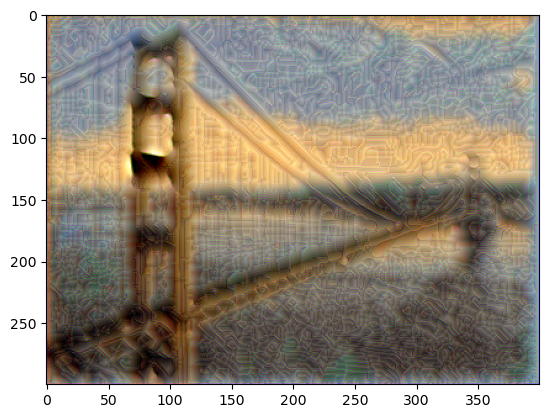

epoch  1510   tensor(5.5770e+17, grad_fn=<AddBackward0>)
epoch  1520   tensor(5.5764e+17, grad_fn=<AddBackward0>)
epoch  1530   tensor(5.5757e+17, grad_fn=<AddBackward0>)
epoch  1540   tensor(5.5750e+17, grad_fn=<AddBackward0>)
epoch  1550   tensor(5.5744e+17, grad_fn=<AddBackward0>)
epoch  1560   tensor(5.5737e+17, grad_fn=<AddBackward0>)
epoch  1570   tensor(5.5731e+17, grad_fn=<AddBackward0>)
epoch  1580   tensor(5.5725e+17, grad_fn=<AddBackward0>)
epoch  1590   tensor(5.5719e+17, grad_fn=<AddBackward0>)
epoch  1600   tensor(5.5713e+17, grad_fn=<AddBackward0>)
epoch  1610   tensor(5.5708e+17, grad_fn=<AddBackward0>)
epoch  1620   tensor(5.5701e+17, grad_fn=<AddBackward0>)
epoch  1630   tensor(5.5695e+17, grad_fn=<AddBackward0>)
epoch  1640   tensor(5.5689e+17, grad_fn=<AddBackward0>)
epoch  1650   tensor(5.5683e+17, grad_fn=<AddBackward0>)
epoch  1660   tensor(5.5677e+17, grad_fn=<AddBackward0>)
epoch  1670   tensor(5.5671e+17, grad_fn=<AddBackward0>)
epoch  1680   tensor(5.5665e+17

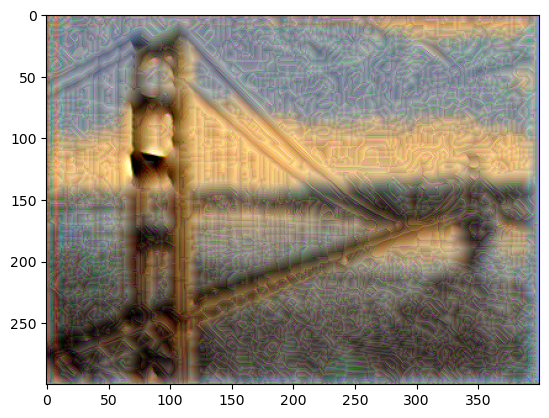

epoch  2010   tensor(5.5522e+17, grad_fn=<AddBackward0>)
epoch  2020   tensor(5.5519e+17, grad_fn=<AddBackward0>)
epoch  2030   tensor(5.5516e+17, grad_fn=<AddBackward0>)
epoch  2040   tensor(5.5512e+17, grad_fn=<AddBackward0>)
epoch  2050   tensor(5.5509e+17, grad_fn=<AddBackward0>)
epoch  2060   tensor(5.5505e+17, grad_fn=<AddBackward0>)
epoch  2070   tensor(5.5502e+17, grad_fn=<AddBackward0>)
epoch  2080   tensor(5.5499e+17, grad_fn=<AddBackward0>)
epoch  2090   tensor(5.5496e+17, grad_fn=<AddBackward0>)
epoch  2100   tensor(5.5493e+17, grad_fn=<AddBackward0>)
epoch  2110   tensor(5.5490e+17, grad_fn=<AddBackward0>)
epoch  2120   tensor(5.5486e+17, grad_fn=<AddBackward0>)
epoch  2130   tensor(5.5483e+17, grad_fn=<AddBackward0>)
epoch  2140   tensor(5.5480e+17, grad_fn=<AddBackward0>)
epoch  2150   tensor(5.5477e+17, grad_fn=<AddBackward0>)
epoch  2160   tensor(5.5474e+17, grad_fn=<AddBackward0>)
epoch  2170   tensor(5.5471e+17, grad_fn=<AddBackward0>)
epoch  2180   tensor(5.5468e+17

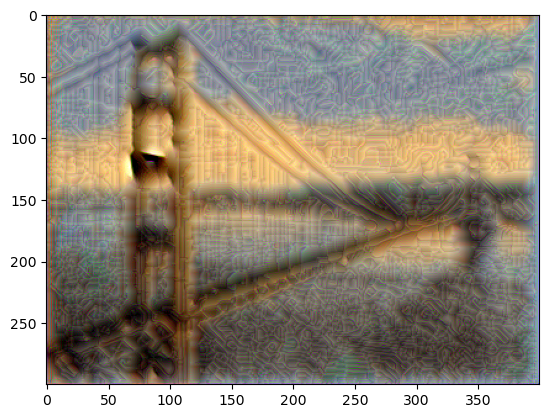

epoch  2510   tensor(5.5388e+17, grad_fn=<AddBackward0>)
epoch  2520   tensor(5.5386e+17, grad_fn=<AddBackward0>)
epoch  2530   tensor(5.5384e+17, grad_fn=<AddBackward0>)
epoch  2540   tensor(5.5381e+17, grad_fn=<AddBackward0>)
epoch  2550   tensor(5.5379e+17, grad_fn=<AddBackward0>)
epoch  2560   tensor(5.5377e+17, grad_fn=<AddBackward0>)
epoch  2570   tensor(5.5375e+17, grad_fn=<AddBackward0>)
epoch  2580   tensor(5.5373e+17, grad_fn=<AddBackward0>)
epoch  2590   tensor(5.5371e+17, grad_fn=<AddBackward0>)
epoch  2600   tensor(5.5369e+17, grad_fn=<AddBackward0>)
epoch  2610   tensor(5.5367e+17, grad_fn=<AddBackward0>)
epoch  2620   tensor(5.5365e+17, grad_fn=<AddBackward0>)
epoch  2630   tensor(5.5363e+17, grad_fn=<AddBackward0>)
epoch  2640   tensor(5.5362e+17, grad_fn=<AddBackward0>)
epoch  2650   tensor(5.5360e+17, grad_fn=<AddBackward0>)
epoch  2660   tensor(5.5358e+17, grad_fn=<AddBackward0>)
epoch  2670   tensor(5.5356e+17, grad_fn=<AddBackward0>)
epoch  2680   tensor(5.5354e+17

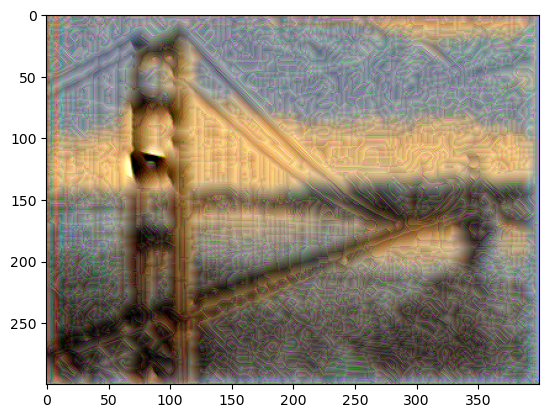

epoch  3010   tensor(5.5300e+17, grad_fn=<AddBackward0>)
epoch  3020   tensor(5.5299e+17, grad_fn=<AddBackward0>)
epoch  3030   tensor(5.5297e+17, grad_fn=<AddBackward0>)
epoch  3040   tensor(5.5296e+17, grad_fn=<AddBackward0>)
epoch  3050   tensor(5.5295e+17, grad_fn=<AddBackward0>)
epoch  3060   tensor(5.5293e+17, grad_fn=<AddBackward0>)
epoch  3070   tensor(5.5291e+17, grad_fn=<AddBackward0>)
epoch  3080   tensor(5.5290e+17, grad_fn=<AddBackward0>)
epoch  3090   tensor(5.5288e+17, grad_fn=<AddBackward0>)
epoch  3100   tensor(5.5287e+17, grad_fn=<AddBackward0>)
epoch  3110   tensor(5.5285e+17, grad_fn=<AddBackward0>)
epoch  3120   tensor(5.5284e+17, grad_fn=<AddBackward0>)
epoch  3130   tensor(5.5283e+17, grad_fn=<AddBackward0>)
epoch  3140   tensor(5.5282e+17, grad_fn=<AddBackward0>)
epoch  3150   tensor(5.5280e+17, grad_fn=<AddBackward0>)
epoch  3160   tensor(5.5278e+17, grad_fn=<AddBackward0>)
epoch  3170   tensor(5.5277e+17, grad_fn=<AddBackward0>)
epoch  3180   tensor(5.5276e+17

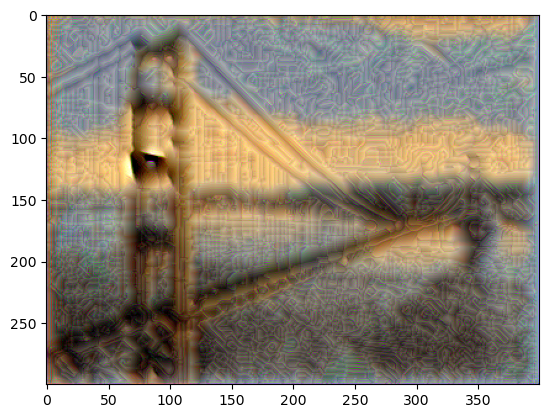

epoch  3510   tensor(5.5236e+17, grad_fn=<AddBackward0>)
epoch  3520   tensor(5.5235e+17, grad_fn=<AddBackward0>)
epoch  3530   tensor(5.5234e+17, grad_fn=<AddBackward0>)
epoch  3540   tensor(5.5233e+17, grad_fn=<AddBackward0>)
epoch  3550   tensor(5.5232e+17, grad_fn=<AddBackward0>)
epoch  3560   tensor(5.5231e+17, grad_fn=<AddBackward0>)
epoch  3570   tensor(5.5230e+17, grad_fn=<AddBackward0>)
epoch  3580   tensor(5.5229e+17, grad_fn=<AddBackward0>)
epoch  3590   tensor(5.5228e+17, grad_fn=<AddBackward0>)
epoch  3600   tensor(5.5227e+17, grad_fn=<AddBackward0>)
epoch  3610   tensor(5.5226e+17, grad_fn=<AddBackward0>)
epoch  3620   tensor(5.5225e+17, grad_fn=<AddBackward0>)
epoch  3630   tensor(5.5224e+17, grad_fn=<AddBackward0>)
epoch  3640   tensor(5.5223e+17, grad_fn=<AddBackward0>)
epoch  3650   tensor(5.5222e+17, grad_fn=<AddBackward0>)
epoch  3660   tensor(5.5221e+17, grad_fn=<AddBackward0>)
epoch  3670   tensor(5.5221e+17, grad_fn=<AddBackward0>)
epoch  3680   tensor(5.5220e+17

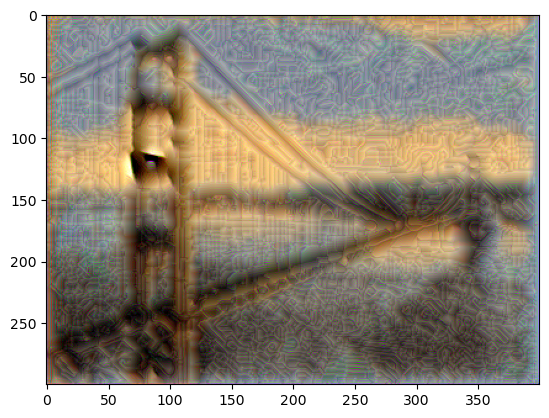

In [16]:
for i in range(1,epochs+1):
    target_features = model_activations(target,model)
    content_loss = torch.mean((content_features['conv4_2']-target_features['conv4_2'])**2)

    style_loss = 0
    for layer in style_wt_meas:
        style_gram = style_grams[layer]
        target_gram = target_features[layer]
        _,d,w,h = target_gram.shape
        target_gram = gram_matrix(target_gram)

        style_loss += (style_wt_meas[layer]*torch.mean((target_gram-style_gram)**2))/d*w*h
    
    total_loss = content_wt*content_loss + style_wt*style_loss 
    
    if i%10==0:       
        print("epoch ",i," ", total_loss)
    
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
    
    if i%print_after == 0:
        plt.imshow(imcnvt(target),label="Epoch "+str(i))
        plt.show()
        plt.imsave(str(i)+'.png',imcnvt(target),format='png')

#Training for 4000 epochs the images original quality is getting changed so training for 500 to 1000 eochs are enough
#to get the good transfer style image